In [9]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
target = 'cardio'
train = pd.read_parquet('train.parquet')
val = pd.read_parquet('val.parquet')
test = pd.read_parquet('test.parquet')

# FIRST

In [5]:
dtrain = xgb.DMatrix(train.drop(columns=target), label=train[target])
dval = xgb.DMatrix(val.drop(columns=target), label=val[target])
dtest = xgb.DMatrix(test.drop(columns=target), label=test[target])

# 4. Параметры модели
params = {
    'objective': 'binary:logistic',
    'eta': 0.1,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

evals = [(dtrain, 'train'), (dval, 'val')]
model = xgb.train(params, 
                  dtrain, 
                  num_boost_round=100, 
                  evals=evals,
                  early_stopping_rounds=10,
                  verbose_eval=10)

[0]	train-logloss:0.66728	val-logloss:0.66702
[10]	train-logloss:0.56179	val-logloss:0.56154
[20]	train-logloss:0.53853	val-logloss:0.54020
[30]	train-logloss:0.53051	val-logloss:0.53515
[40]	train-logloss:0.52587	val-logloss:0.53373
[50]	train-logloss:0.52256	val-logloss:0.53322
[60]	train-logloss:0.51966	val-logloss:0.53315
[66]	train-logloss:0.51813	val-logloss:0.53331


In [11]:
y_pred_prob = model.predict(dtest)
y_pred = (y_pred_prob > 0.5).astype(int)

def print_metrics(y_true, y_pred, y_pred_prob):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-score:", f1_score(y_true, y_pred))
    print("ROC-AUC:", roc_auc_score(y_true, y_pred_prob))

print("\nTest set metrics:")
print_metrics(test[target], y_pred, y_pred_prob)

print("\nTrain set metrics:")
y_train_pred_prob = model.predict(dtrain)
y_train_pred = (y_train_pred_prob > 0.5).astype(int)
print_metrics(train[target], y_train_pred, y_train_pred_prob)

print("\nValidation set metrics:")
y_val_pred_prob = model.predict(dval)
y_val_pred = (y_val_pred_prob > 0.5).astype(int)
print_metrics(val[target], y_val_pred, y_val_pred_prob)


Test set metrics:
Accuracy: 0.7400714285714286
Precision: 0.7600616808018504
Recall: 0.702937820878494
F1-score: 0.7303845298955324
ROC-AUC: 0.8012994466759249

Train set metrics:
Accuracy: 0.7476666666666667
Precision: 0.7701275616896696
Recall: 0.7037550162430728
F1-score: 0.7354468297553669
ROC-AUC: 0.8226350132977358

Validation set metrics:
Accuracy: 0.7387142857142858
Precision: 0.7626380463524653
Recall: 0.6969438521677328
F1-score: 0.7283125371360666
ROC-AUC: 0.8082084807222222


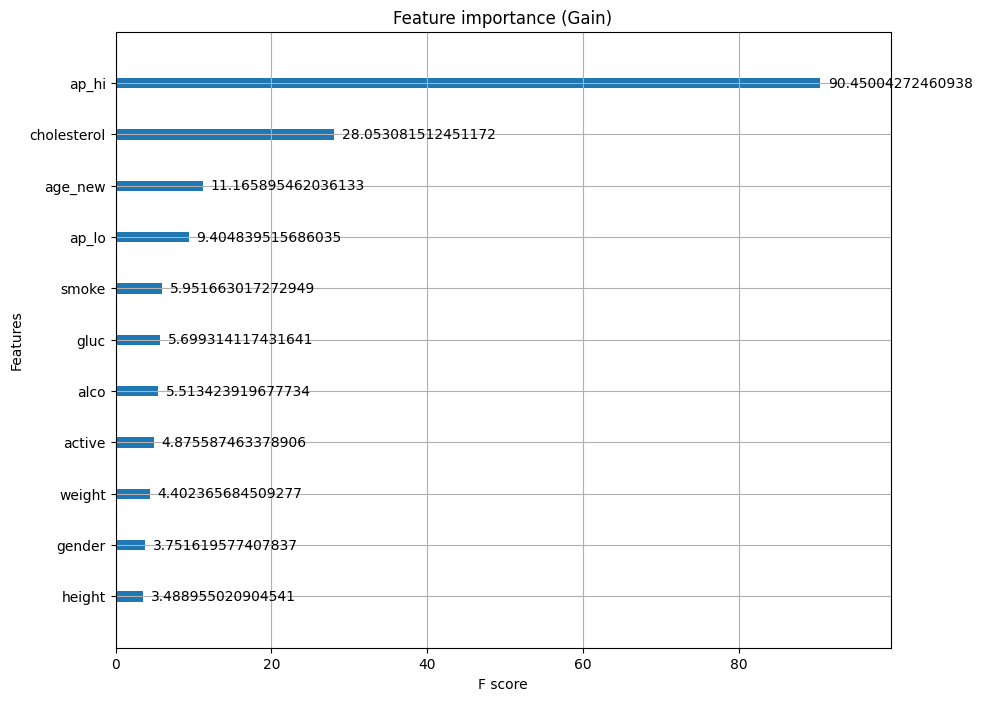

In [14]:
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(10, 8))
plot_importance(model, ax=ax, importance_type='gain', max_num_features=20)
plt.title("Feature importance (Gain)")
plt.show()

# SECOND 

In [15]:
train = train.drop(columns=['active', 'weight', 'gender', 'height'])
val = val.drop(columns=['active', 'weight', 'gender', 'height'])
test = test.drop(columns=['active', 'weight', 'gender', 'height'])

In [16]:
dtrain = xgb.DMatrix(train.drop(columns=target), label=train[target])
dval = xgb.DMatrix(val.drop(columns=target), label=val[target])
dtest = xgb.DMatrix(test.drop(columns=target), label=test[target])

# 4. Параметры модели
params = {
    'objective': 'binary:logistic',
    'eta': 0.1,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

evals = [(dtrain, 'train'), (dval, 'val')]
model = xgb.train(params, 
                  dtrain, 
                  num_boost_round=100, 
                  evals=evals,
                  early_stopping_rounds=10,
                  verbose_eval=10)

[0]	train-logloss:0.67329	val-logloss:0.67281
[10]	train-logloss:0.57148	val-logloss:0.56959
[20]	train-logloss:0.54457	val-logloss:0.54370
[30]	train-logloss:0.53715	val-logloss:0.53787
[40]	train-logloss:0.53358	val-logloss:0.53616
[50]	train-logloss:0.53131	val-logloss:0.53571
[60]	train-logloss:0.52973	val-logloss:0.53566
[67]	train-logloss:0.52871	val-logloss:0.53569


In [17]:
y_pred_prob = model.predict(dtest)
y_pred = (y_pred_prob > 0.5).astype(int)

def print_metrics(y_true, y_pred, y_pred_prob):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-score:", f1_score(y_true, y_pred))
    print("ROC-AUC:", roc_auc_score(y_true, y_pred_prob))

print("\nTest set metrics:")
print_metrics(test[target], y_pred, y_pred_prob)

print("\nTrain set metrics:")
y_train_pred_prob = model.predict(dtrain)
y_train_pred = (y_train_pred_prob > 0.5).astype(int)
print_metrics(train[target], y_train_pred, y_train_pred_prob)

print("\nValidation set metrics:")
y_val_pred_prob = model.predict(dval)
y_val_pred = (y_val_pred_prob > 0.5).astype(int)
print_metrics(val[target], y_val_pred, y_val_pred_prob)


Test set metrics:
Accuracy: 0.7382142857142857
Precision: 0.760466926070039
Recall: 0.6968054763262977
F1-score: 0.7272456649549751
ROC-AUC: 0.7973007206388524

Train set metrics:
Accuracy: 0.7411190476190476
Precision: 0.765450994880456
Recall: 0.6928626027135486
F1-score: 0.7273502344592392
ROC-AUC: 0.8128911061416662

Validation set metrics:
Accuracy: 0.7355
Precision: 0.7599875156054932
Recall: 0.6922530206112296
F1-score: 0.7245406531280221
ROC-AUC: 0.8057085202640271


# LAST

In [18]:
import optuna
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

def objective(trial):
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'tree_method': 'hist',
        'verbosity': 0,
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.1, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 100, 2000),
    }
    
    model = xgb.XGBClassifier(**params)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, train.drop(columns=target), train[target], cv=skf, scoring='roc_auc', n_jobs=-1)
    
    return scores.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)


print("Best trial:")
trial = study.best_trial
print(f"  ROC-AUC: {trial.value:.5f}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

[I 2025-04-07 18:53:18,234] A new study created in memory with name: no-name-24874193-90cf-4c52-af8c-a5c1ebaf0737
[I 2025-04-07 18:53:20,664] Trial 0 finished with value: 0.7799044471363125 and parameters: {'learning_rate': 0.19801514370546064, 'max_depth': 8, 'min_child_weight': 2, 'subsample': 0.14279582299814553, 'colsample_bytree': 0.4069712810573376, 'n_estimators': 1022}. Best is trial 0 with value: 0.7799044471363125.
[I 2025-04-07 18:53:21,440] Trial 1 finished with value: 0.7966033635785624 and parameters: {'learning_rate': 0.08938515495578082, 'max_depth': 4, 'min_child_weight': 10, 'subsample': 0.2606846877203707, 'colsample_bytree': 0.875722168678616, 'n_estimators': 193}. Best is trial 1 with value: 0.7966033635785624.
[I 2025-04-07 18:53:25,056] Trial 2 finished with value: 0.7690694918676917 and parameters: {'learning_rate': 0.10203485642066379, 'max_depth': 9, 'min_child_weight': 8, 'subsample': 0.8570877085443023, 'colsample_bytree': 0.8075383065282418, 'n_estimators':

Best trial:
  ROC-AUC: 0.79775
  Params: 
    learning_rate: 0.010630096732481099
    max_depth: 4
    min_child_weight: 1
    subsample: 0.49603622014048104
    colsample_bytree: 0.7664869015912145
    n_estimators: 883


In [21]:
dtrain = xgb.DMatrix(train.drop(columns=target), label=train[target])
dval = xgb.DMatrix(val.drop(columns=target), label=val[target])
dtest = xgb.DMatrix(test.drop(columns=target), label=test[target])

# 4. Параметры модели
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'tree_method': 'hist',
    'verbosity': 0,
    'learning_rate': 0.010630096732481099,
    'max_depth': 4,
    'subsample': 0.49603622014048104,
    'colsample_bytree': 0.7664869015912145,
    'n_estimators': 883,
    'seed': 42
}

evals = [(dtrain, 'train'), (dval, 'val')]
model = xgb.train(params, 
                  dtrain, 
                  num_boost_round=100, 
                  evals=evals)

[0]	train-logloss:0.69106	val-logloss:0.69103
[1]	train-logloss:0.68855	val-logloss:0.68846
[2]	train-logloss:0.68607	val-logloss:0.68591
[3]	train-logloss:0.68430	val-logloss:0.68410
[4]	train-logloss:0.68177	val-logloss:0.68150
[5]	train-logloss:0.67928	val-logloss:0.67893
[6]	train-logloss:0.67746	val-logloss:0.67705
[7]	train-logloss:0.67520	val-logloss:0.67474
[8]	train-logloss:0.67355	val-logloss:0.67306
[9]	train-logloss:0.67197	val-logloss:0.67144
[10]	train-logloss:0.66975	val-logloss:0.66918
[11]	train-logloss:0.66746	val-logloss:0.66681
[12]	train-logloss:0.66532	val-logloss:0.66463
[13]	train-logloss:0.66450	val-logloss:0.66377
[14]	train-logloss:0.66233	val-logloss:0.66152
[15]	train-logloss:0.66017	val-logloss:0.65929
[16]	train-logloss:0.65818	val-logloss:0.65726
[17]	train-logloss:0.65615	val-logloss:0.65517
[18]	train-logloss:0.65415	val-logloss:0.65310
[19]	train-logloss:0.65230	val-logloss:0.65121
[20]	train-logloss:0.65086	val-logloss:0.64973
[21]	train-logloss:0.64

In [22]:
y_pred_prob = model.predict(dtest)
y_pred = (y_pred_prob > 0.5).astype(int)

def print_metrics(y_true, y_pred, y_pred_prob):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-score:", f1_score(y_true, y_pred))
    print("ROC-AUC:", roc_auc_score(y_true, y_pred_prob))

print("\nTest set metrics:")
print_metrics(test[target], y_pred, y_pred_prob)

print("\nTrain set metrics:")
y_train_pred_prob = model.predict(dtrain)
y_train_pred = (y_train_pred_prob > 0.5).astype(int)
print_metrics(train[target], y_train_pred, y_train_pred_prob)

print("\nValidation set metrics:")
y_val_pred_prob = model.predict(dval)
y_val_pred = (y_val_pred_prob > 0.5).astype(int)
print_metrics(val[target], y_val_pred, y_val_pred_prob)


Test set metrics:
Accuracy: 0.7370714285714286
Precision: 0.7601124472903327
Recall: 0.694095835710211
F1-score: 0.7256056653000372
ROC-AUC: 0.7959333492735162

Train set metrics:
Accuracy: 0.732904761904762
Precision: 0.7552285864424593
Recall: 0.6866042423084273
F1-score: 0.7192833191531955
ROC-AUC: 0.7969068603113879

Validation set metrics:
Accuracy: 0.7360714285714286
Precision: 0.7604491578290705
Recall: 0.6931058990760484
F1-score: 0.7252175206365732
ROC-AUC: 0.8037903090434404
